# Test Filtering

(This notebook is based on Georgia Tech's CS 6476 course, thanks to James Hays)

This script has test cases to help you test `my_imfilter()`, which you will write. You should verify that you get reasonable output here before using your filtering to construct a hybrid image in `proj2.ipynb`. The outputs are all saved and you can include them in your writeup. You can add calls to OpenCV's `filter2D()` if you want to check that `my_imfilter()` is doing something similar.

## Setup

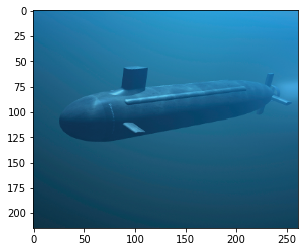

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from utils import load_image, save_image
from project2 import my_imfilter

test_image = load_image('images/submarine.bmp')
test_image = cv2.resize(test_image, (0, 0), fx=0.7, fy=0.7)
plt.imshow(test_image)


## Identity filter
This filter should do nothing regardless of the padding method you use.

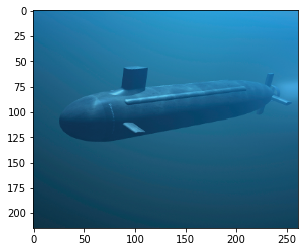

In [2]:
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
done = save_image('../results/identity_image.jpg', identity_image)

## Small blur with a box filter
This filter should remove some high frequencies.

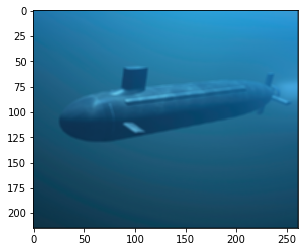

In [3]:
blur_filter = np.ones((3, 3))
blur_filter /= np.sum(blur_filter)  # making the filter sum to 1
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
done = save_image('../results/blur_image.jpg', blur_image)

## Large blur
This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.

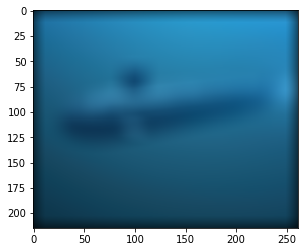

In [4]:
large_1d_blur_filter = cv2.getGaussianKernel(ksize=25, sigma=10)
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
# notice the T operator which transposes the filter
large_blur_image = my_imfilter(large_blur_image, large_1d_blur_filter.T)
plt.imshow(large_blur_image)
done = save_image('../results/large_blur_image.jpg', large_blur_image)

If you want to see how slow this would be to do naively, try out this equivalent operation:

In [5]:
import time
large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
t = time.time()
large_blur_image = my_imfilter(test_image, large_blur_filter);
t = time.time() - t
print('{:f} seconds'.format(t))

1.464280 seconds


## Oriented filter (Sobel operator)

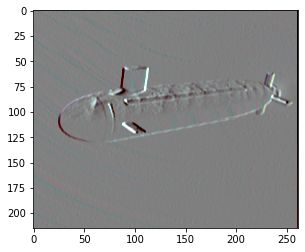

In [6]:
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
done = save_image('../results/sobel_image.jpg', sobel_image)

## High pass filter (discrete Laplacian)

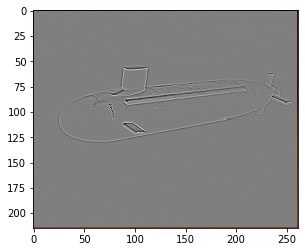

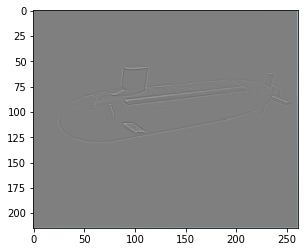

In [7]:
laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image('../results/laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image('../results/high_pass_image.jpg', high_pass_image)